#Trabajo Practico - Data Science - Dicsys
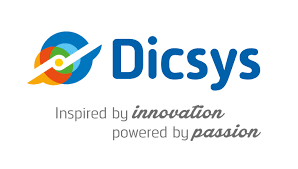

In [ ]:
# Importamos las librerias necesarias para trabajar con set de datos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
def status(data):

    data2=data

    tot_rows=len(data2)
    
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    d2['q_zeros']=(data2==0).sum().values

    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    d2['unique']=data2.nunique().values
    
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [ ]:
peliculas = pd.read_csv('RatingsPeliculas.csv')

In [ ]:
peliculas.shape

(559, 6)

In [ ]:
peliculas.head()

,Pelicula,Genero,Ratings de Rotten Tomatoes %,Ratings de la Audience %,Presupuesto (millones USD),Lanzamiento
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [ ]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Pelicula                      559 non-null    object
 1   Genero                        559 non-null    object
 2   Ratings de Rotten Tomatoes %  559 non-null    int64 
 3   Ratings de la Audience %      559 non-null    int64 
 4   Presupuesto (millones USD)    559 non-null    int64 
 5   Lanzamiento                   559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
status(peliculas)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Pelicula,0,0.0,0,0.000000,559,object
1,Genero,0,0.0,0,0.000000,7,category
2,RatingCriticos,0,0.0,3,0.005367,98,int64
3,RatingAudiencia,0,0.0,2,0.003578,74,int64
4,PresupuestoMill,0,0.0,8,0.014311,99,int64
5,Lanzamiento,0,0.0,0,0.000000,5,category


In [ ]:
peliculas.Genero.value_counts()

Comedia     172
Accion      154
Drama       101
Terror       49
Suspenso     36
Aventura     29
Romance      18
Name: Genero, dtype: int64

In [ ]:
peliculas.Genero.value_counts(normalize=True)

Comedia     0.307692
Accion      0.275492
Drama       0.180680
Terror      0.087657
Suspenso    0.064401
Aventura    0.051878
Romance     0.032200
Name: Genero, dtype: float64

In [ ]:
# Modificamos el nombre de las columnas, unificando criterio de nombres sin espacio

#Pelicula = nombre de la pelicula
#Genero = categoria que integra la pelicula
#RatingCriticos = puntaje de los criticos en porcentaje
#RatingAudiencia = puntaje de aceptacion por parte del publico en porcentaje
#PresupuestoMill = presupuesto de la pelicula en millones de dolares
#Lanzamiento = año en que se estreno la pelicula

peliculas.columns = ['Pelicula','Genero','RatingCriticos','RatingAudiencia','PresupuestoMill','Lanzamiento']

In [ ]:
peliculas.head()

,Pelicula,Genero,RatingCriticos,RatingAudiencia,PresupuestoMill,Lanzamiento
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [ ]:
# Definimos como CATEGORICO al 'Genero' y 'Lanzamiento':

peliculas.Genero = peliculas.Genero.astype('category')
peliculas.Lanzamiento = peliculas.Lanzamiento.astype('category')

In [ ]:
peliculas.Genero.cat.categories

Index(['Accion', 'Aventura', 'Comedia', 'Drama', 'Romance', 'Suspenso',
       'Terror'],
      dtype='object')

In [ ]:
peliculas.Lanzamiento.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [ ]:
#ignoramos los warnigns que aparacen encima del grafico
import warnings           
warnings.filterwarnings('ignore')

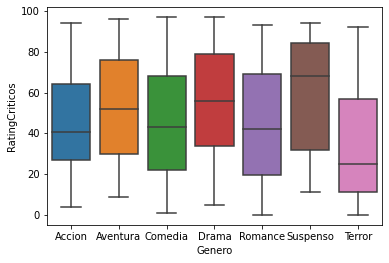

In [ ]:
# BOXPLOT:
z = sns.boxplot(data = peliculas, x = 'Genero', y = 'RatingCriticos')

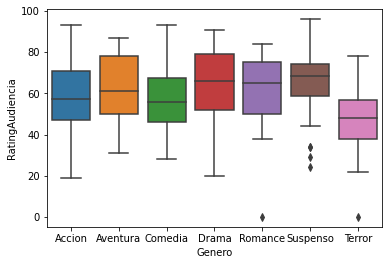

In [ ]:
z1 = sns.boxplot(data = peliculas, x = 'Genero', y = 'RatingAudiencia')

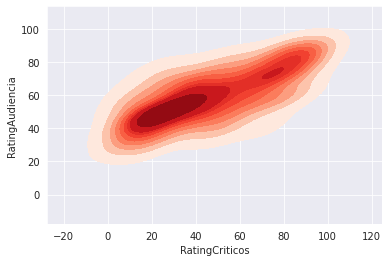

In [ ]:
# Diagrama de la densidad de kernel
sns.set_style('darkgrid')

k1 = sns.kdeplot(peliculas.RatingCriticos, peliculas.RatingAudiencia, shade = True, shade_lowest = False, cmap = 'Reds')

In [ ]:
# Filtro para ver las peliculas que cuyo rating de criticos este entre 70 y 80

peliculas[(peliculas.RatingCriticos > 70) & (peliculas.RatingCriticos < 80)]

,Pelicula,Genero,RatingCriticos,RatingAudiencia,PresupuestoMill,Lanzamiento
11,A Dangerous Method,Drama,79,89,20,2011
14,A Very Harold and Kumar Christmas,Comedia,72,71,19,2011
25,American Gangster,Suspenso,79,87,100,2007
29,Appaloosa,Accion,77,55,20,2008
38,Bandslam,Comedia,79,60,20,2009
45,Beowulf,Accion,71,52,150,2007
57,Burn After Reading,Comedia,78,64,37,2008
58,Captain America: The First Avenger,Accion,78,75,140,2011
67,Cloverfield,Accion,77,67,25,2008
78,"Crazy, Stupid, Love",Romance,78,81,50,2011


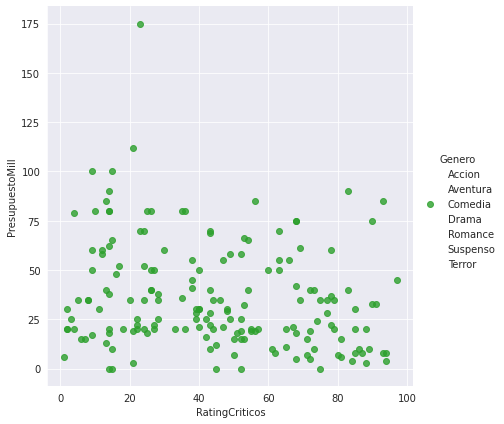

In [ ]:
vis2 = sns.lmplot(data = peliculas[peliculas.Genero == 'Comedia'], x = 'RatingCriticos', y = 'PresupuestoMill', fit_reg = False, size = 6, hue = 'Genero')

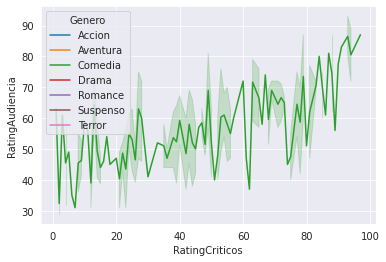

In [ ]:
sns.lineplot(x="RatingCriticos", y="RatingAudiencia", hue="Genero", data=peliculas[peliculas.Genero == 'Comedia'])

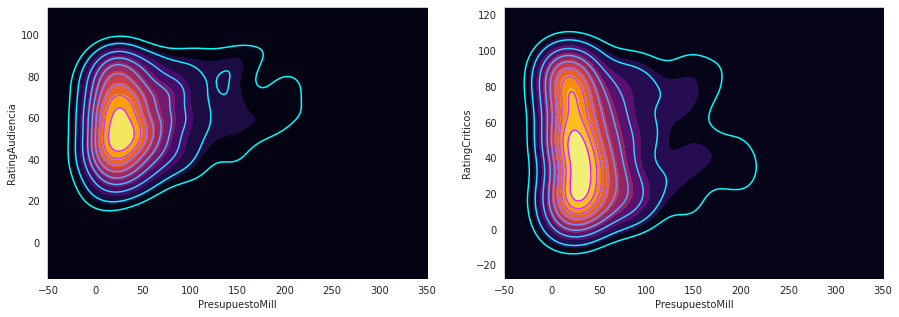

In [ ]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1, 2, figsize = (15, 5))
k1 = sns.kdeplot(peliculas.PresupuestoMill, peliculas.RatingAudiencia, 
                 shade= True, shade_lowest= True, cmap= 'inferno', ax = axes[0])
k1b = sns.kdeplot(peliculas.PresupuestoMill, peliculas.RatingAudiencia, 
                 cmap= 'cool', ax = axes[0])

k2 = sns.kdeplot(peliculas.PresupuestoMill, peliculas.RatingCriticos,
                 shade= True, shade_lowest= True, cmap= 'inferno', ax = axes[1])
k2b = sns.kdeplot(peliculas.PresupuestoMill, peliculas.RatingCriticos,
                 cmap= 'cool', ax = axes[1])

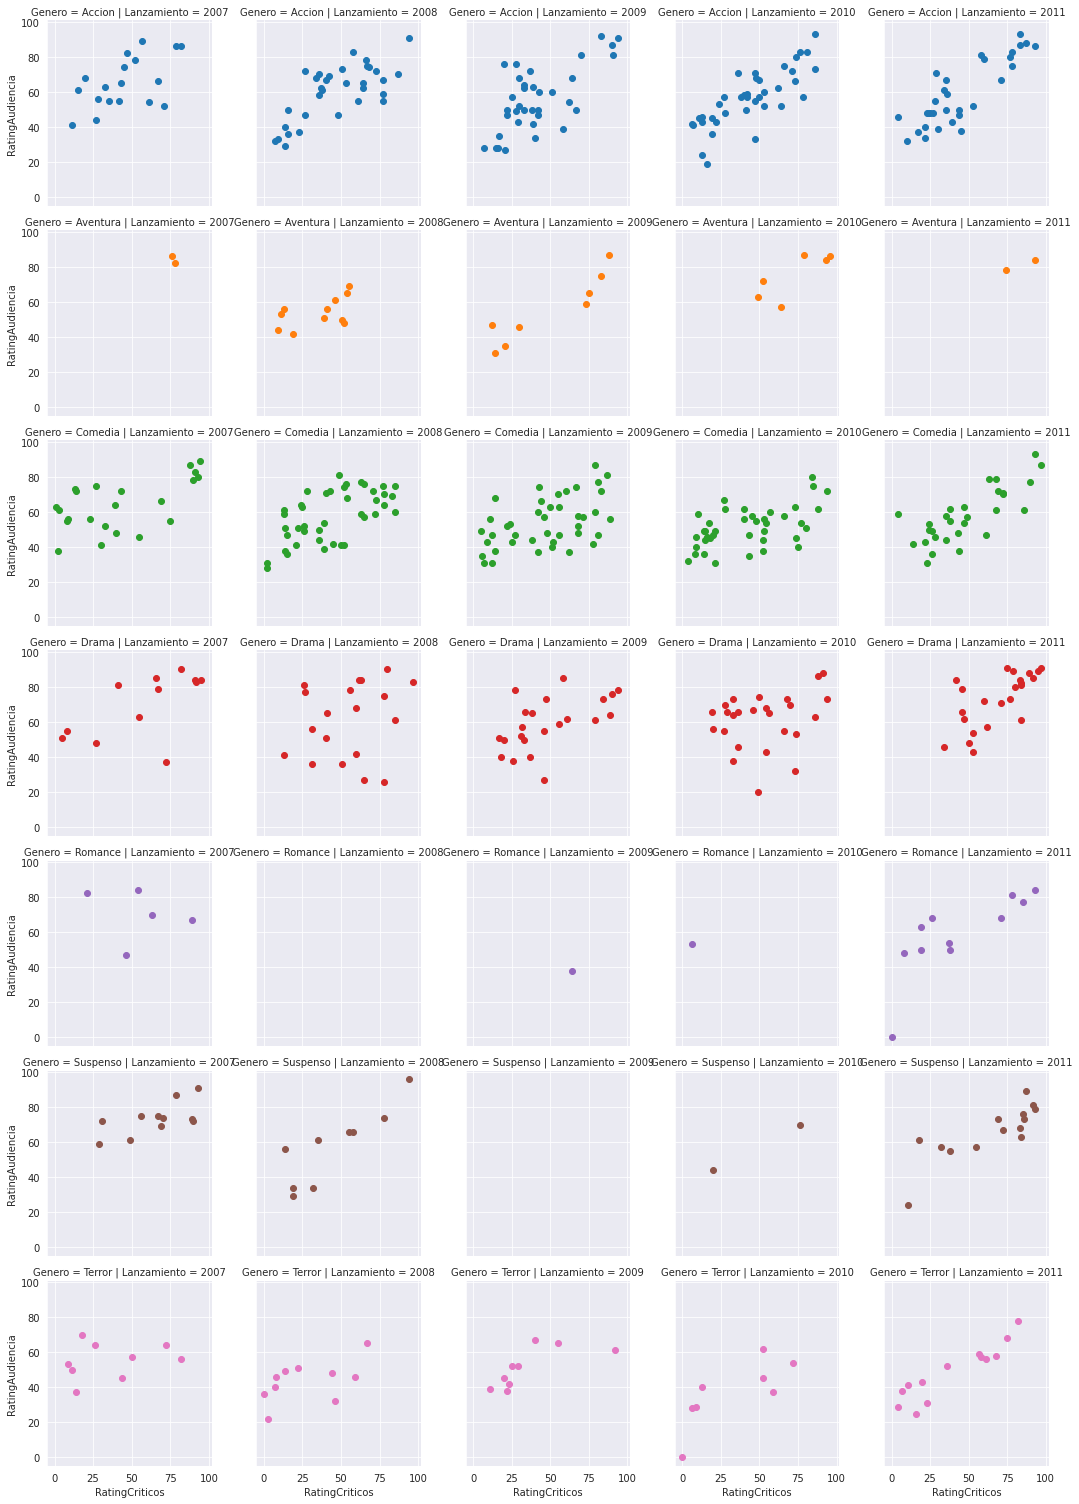

In [ ]:
# Facet Grid:

g = sns.FacetGrid(peliculas, row = 'Genero', col = 'Lanzamiento', hue = 'Genero')
g = g.map(plt.scatter, 'RatingCriticos', 'RatingAudiencia')

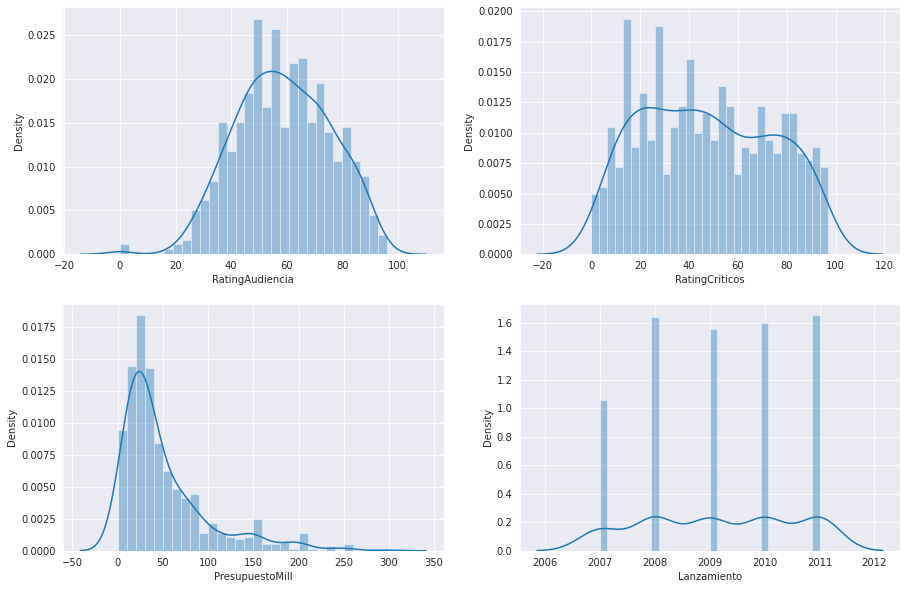

In [ ]:
# Distribucion:

f, axes = plt.subplots(2, 2, figsize = (15, 10))
vis = sns.distplot(peliculas['RatingAudiencia'], bins=30, ax = axes[0,0])
vis = sns.distplot(peliculas['RatingCriticos'], bins=30, ax = axes[0,1])
vis = sns.distplot(peliculas['PresupuestoMill'], bins=30, ax = axes[1,0])
vis = sns.distplot(peliculas['Lanzamiento'], bins=30, ax = axes[1,1])

In [ ]:
# Filtro por peliculas que no tienen presupuesto

peliculas[peliculas.PresupuestoMill == 0]

,Pelicula,Genero,RatingCriticos,RatingAudiencia,PresupuestoMill,Lanzamiento
154,Greenberg,Comedia,75,40,0,2010
185,I'm Still Here,Comedia,52,38,0,2010
201,Jane Eyre,Romance,85,77,0,2011
287,Our Family Wedding,Comedia,14,49,0,2010
356,Soul Men,Comedia,45,42,0,2008
474,The Spy Next Door,Accion,13,46,0,2010
487,The Uninvited,Drama,31,52,0,2009
539,When in Rome,Comedia,15,44,0,2010


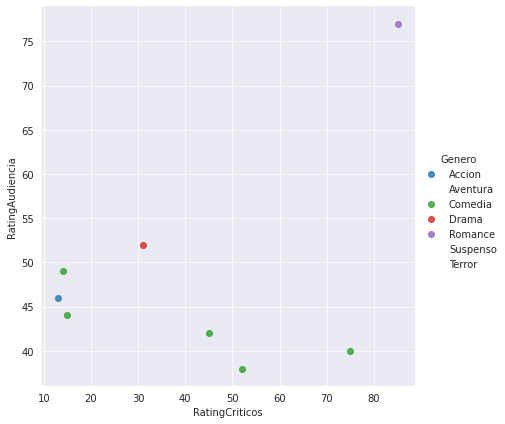

In [ ]:
# Peliculas que no tuvieron presupuesto

vis2 = sns.lmplot(data = peliculas[peliculas.PresupuestoMill == 0], x = 'RatingCriticos', y = 'RatingAudiencia', fit_reg = False, size = 6, hue = 'Genero')

In [ ]:
# peliculas con cero 'RatingCriticos' y cero 'RatingAudiencia'
# peliculas[(peliculas.RatingCriticos == 0)]# & (peliculas.RatingAudiencia == 0)]
peliculas[(peliculas.RatingAudiencia == 0)]# & (peliculas.RatingAudiencia == 0)]

,Pelicula,Genero,RatingCriticos,RatingAudiencia,PresupuestoMill,Lanzamiento
293,Paranormal Activity 2,Terror,0,0,3,2010
354,Something Borrowed,Romance,0,0,35,2011


In [ ]:
peliculas.Genero.value_counts(normalize=True)

Comedia     0.307692
Accion      0.275492
Drama       0.180680
Terror      0.087657
Suspenso    0.064401
Aventura    0.051878
Romance     0.032200
Name: Genero, dtype: float64

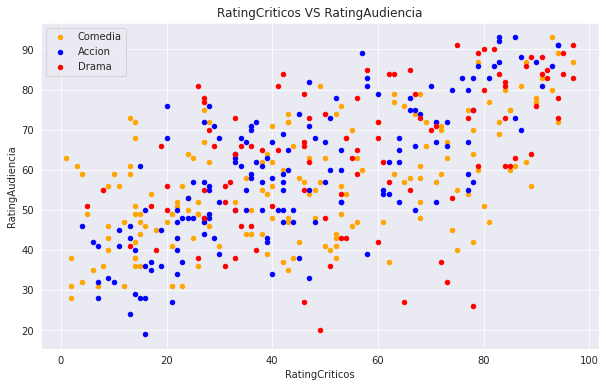

In [ ]:
#Primer grupo compuesto por los 3 generos que abarcan la mayoria de peliculas (Comedia, Accion, Drama)

fig = peliculas[peliculas.Genero=='Comedia'].plot(kind='scatter',x='RatingCriticos',y='RatingAudiencia',color='orange', label='Comedia')
peliculas[peliculas.Genero=='Accion'].plot.scatter(x='RatingCriticos',y='RatingAudiencia',color='blue', label='Accion',ax=fig)
peliculas[peliculas.Genero=='Drama'].plot.scatter(x='RatingCriticos',y='RatingAudiencia',color='red', label='Drama',ax=fig)
fig.set_xlabel("RatingCriticos")
fig.set_ylabel("RatingAudiencia")
fig.set_title("RatingCriticos VS RatingAudiencia")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

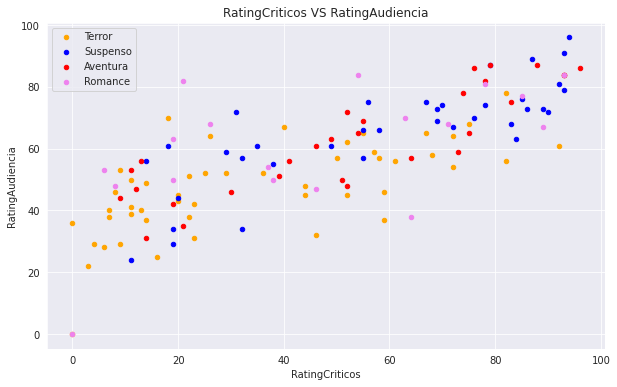

In [ ]:
# Segundo grupo compuesto por el resto de las categorias (Terror, Suspenso, Aventura, Romance)

fig2 = peliculas[peliculas.Genero=='Terror'].plot(kind='scatter',x='RatingCriticos',y='RatingAudiencia',color='orange', label='Terror')
peliculas[peliculas.Genero=='Suspenso'].plot.scatter(x='RatingCriticos',y='RatingAudiencia',color='blue', label='Suspenso',ax=fig2)
peliculas[peliculas.Genero=='Aventura'].plot.scatter(x='RatingCriticos',y='RatingAudiencia',color='red', label='Aventura',ax=fig2)
peliculas[peliculas.Genero=='Romance'].plot.scatter(x='RatingCriticos',y='RatingAudiencia',color='violet', label='Romance',ax=fig2)
fig2.set_xlabel("RatingCriticos")
fig2.set_ylabel("RatingAudiencia")
fig2.set_title("RatingCriticos VS RatingAudiencia")
fig2=plt.gcf()
fig2.set_size_inches(10,6)
plt.show()

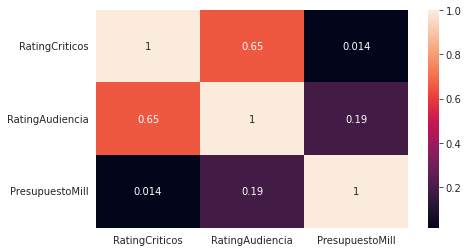

In [ ]:
# Correlacion:

plt.figure(figsize=(7,4)) 
sns.heatmap(peliculas.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn import tree

from sklearn.model_selection import train_test_split

In [ ]:
peliculas.shape

(559, 6)

In [ ]:
# Creo otra dataframe partiendo del original para pruebas
peliculas2 = peliculas

In [ ]:
peliculas2.head(2)

,Pelicula,Genero,RatingCriticos,RatingAudiencia,PresupuestoMill,Lanzamiento
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008


In [ ]:
# Elimino la columna 'Pelicula' con el objetivo de analizar solo el 'Genero'
peliculas2.drop('Pelicula',axis=1,inplace=True)

In [ ]:
peliculas2.head(2)

,Genero,RatingCriticos,RatingAudiencia,PresupuestoMill,Lanzamiento
0,Comedia,87,81,8,2009
1,Aventura,9,44,105,2008


#Creamos las tablas de entrenamiento y validacion

In [ ]:
# Utilizamos una proporcion 70/30 para las tablas de entrenamiento y validacion

X = peliculas2.iloc[:,1:].values
y = peliculas2.iloc[:,-5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(391, 4)
(391,)
(168, 4)
(168,)


##Regresion Logistica

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
#print('accuracy:',metrics.accuracy_score(prediction,y_test))

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

      Accion       0.51      0.35      0.42        51
    Aventura       0.00      0.00      0.00         9
     Comedia       0.37      0.66      0.48        56
       Drama       0.35      0.32      0.33        28
     Romance       0.00      0.00      0.00         7
    Suspenso       0.00      0.00      0.00         7
      Terror       0.25      0.20      0.22        10

    accuracy                           0.39       168
   macro avg       0.21      0.22      0.21       168
weighted avg       0.35      0.39      0.35       168



In [ ]:
# se usa para ver como ajusta el modelo con los datos de entrenamiento
prediction=model.predict(X_train)
#print('accuracy:',metrics.accuracy_score(prediction,y_train))
report = classification_report(y_train, prediction)
print(report)


              precision    recall  f1-score   support

      Accion       0.53      0.59      0.56       103
    Aventura       0.00      0.00      0.00        20
     Comedia       0.36      0.64      0.46       116
       Drama       0.43      0.32      0.37        73
     Romance       0.00      0.00      0.00        11
    Suspenso       0.00      0.00      0.00        29
      Terror       0.41      0.18      0.25        39

    accuracy                           0.42       391
   macro avg       0.25      0.25      0.23       391
weighted avg       0.37      0.42      0.38       391

